# **Final Project :2025S**

## Advanced Python AI and ML Tools

### Predictive Model Development with Modern Datasets and Visual Analytics

We use the 2023 Stack Overflow Developer Survey to understand what drives developer salaries. Our objective is to build a model that can predict salary based on skills, tools, experience, and other relevant factors.

**Data Source**: [Stack Overflow Developer Survey (2023)](https://survey.stackoverflow.co/)
Over 90,000 developers took part in the May 2023 survey. They shared how they learn, which tools they use, and how they approach career development.

In this project, we:

* Explore a real-world dataset with responses from developers worldwide
* Prepare the data for analysis using modern Python libraries
* Analyze key relationships between variables and salary outcomes
* Train and evaluate machine learning models to predict compensation

We start by importing the necessary libraries.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df_stack_overflow_2023 = pd.read_csv('survey_results_public.csv')

In [3]:
print("Shape of dataset:", df_stack_overflow_2023.shape)
df_stack_overflow_2023.head()

Shape of dataset: (89184, 84)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
df_stack_overflow_2023.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

**Observations**

* The dataset includes both demographic and technical details.
* `LearnCode`, `LearnCodeOnline`, and `LearnCodeCoursesCert` show how respondents started coding.
* `YearsCode`, `YearsCodePro`, and `WorkExp` show different types of experience.
* `CompTotal` and `ConvertedCompYearly` show compensation figures.
* Many columns display tools and technologies usage, especially with patterns like `HaveWorkedWith` and `WantToWorkWith`.
* Other columns focus on AI usage, such as `AISent`, `AIBen`, and `AIToolCurrently Using`.
* `SurveyEase` and `SurveyLength` show how respondents felt about the survey.
* `ResponseId`, `Q120`, and `MainBranch` appear to come from the survey structure.

In [5]:
df_stack_overflow_2023.dtypes

ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object

In [6]:
df_stack_overflow_2023.dtypes.value_counts()

object     80
float64     3
int64       1
Name: count, dtype: int64

**Observations**

* 80 columns are `object` types, likely text or categorical data.
* Only 3 columns are numeric `float64` and 1 column is `int64`.
* We will need do encoding for most features.

### Convert  to Numeric and Drop all NA of CompTotal (Target)

In [7]:
# Convert CompTotal to numeric, coerce errors (turn invalid strings into NaN)
df_stack_overflow_2023["CompTotal"] = pd.to_numeric(df_stack_overflow_2023["CompTotal"], errors='coerce')

# Now drop actual NaN values
df_stack_overflow_2023 = df_stack_overflow_2023.dropna(subset=["CompTotal"])

print("NaN count in CompTotal:", df_stack_overflow_2023["CompTotal"].isna().sum())

NaN count in CompTotal: 0


###  Drop all rows where the Currency column does NOT contain "USD",

**Strategy**

* We limited the dataset to U.S.-based respondents to avoid currency-related inconsistencies.
* Global salary data comes in many local currencies, which would require conversion using exchange rates, inflation, or cost-of-living adjustments, all of which add noise and potential bias. U.S. salaries are already in USD, so no conversion is needed.
* The U.S. has the largest respondent count (18,026) compared to other countries, so that provides a solid representation for modeling.
* Since U.S. is one of the largest tech markets, it offers a solid benchmark as well. 

In [ ]:
# Check original shape
print("Original shape:", df_stack_overflow_2023.shape)

# Filter dataset to include only respondents paid in USD and located in the United States

df_stack_overflow_2023 = df_stack_overflow_2023[
    df_stack_overflow_2023['Currency'].str.contains("USD", na=False) &
    df_stack_overflow_2023['Country'].str.contains("united states", case=False, na=False)
].copy()

# Check result
print("Shape after filtering for USD + USA:", df_stack_overflow_2023.shape)

Original shape: (48225, 84)
Shape after filtering for USD + USA: (11896, 84)


### Double check that the COUNTRY field only contains United States of America or USA

In [9]:
#  Check the unique country values after filtering
print(df_stack_overflow_2023['Country'].unique())

['United States of America']


### Removing Irrelevant Columns

**Strategy**

Here, we will remove irrelevant columns.

* `Q120` – Shows general agreement with a consent statement. We removed it since it does not contribute to prediction.
* `SurveyLength`, `SurveyEase` – Reflect subjective opinions about the survey experience. We removed them since they are not related to salary.
* `TechList`, `BuyNewTool`, `ProfessionalTech` – Focus on tool purchase behavior or company-level decisions. We removed them since they are too general or intention-based.
* `AIAcc`, `AIBen`, `AISent`, `AINextNeither different nor similar`, `AINextSomewhat similar`, `AINextVery similar`, `AINextSomewhat different`, `AINextVery different` – Contain opinions or speculation about AI tools and trends. We removed them since they are not useful for modeling salary.
* `LanguageWantToWorkWith`, `DatabaseWantToWorkWith`, `PlatformWantToWorkWith`, `WebframeWantToWorkWith`, `MiscTechWantToWorkWith`, `ToolsTechWantToWorkWith`, `NEWCollabToolsWantToWorkWith`, `OfficeStackAsyncWantToWorkWith`, `OfficeStackSyncWantToWorkWith`, `AISearchWantToWorkWith`, `AIDevWantToWorkWith`, `AIToolInterestedInUsing`, `AIToolInterested in Using`, `AIToolNot interested in Using` – Capture future tool or tech preferences. We removed them since they don’t reflect current skills.
* `CodingActivities`, `LearnCode`, `LearnCodeOnline` – Capture how or why someone codes or learns. We removed them since they overlap with more specific fields.
* `Country`, `Currency`, `Rate_to_USD` – Related to location or conversion. We removed them since salary has already been standardized, and we have chosen U.S as the country.
* `TimeSearching`, `TimeAnswering` – Self-reported time use. We removed them since they are hard to verify and not directly related to compensation.
* `TBranch` – Related to survey routing. We removed it since it's not relevant.
* `CompTotalUSD Range` – A binned version of salary. We removed it since we use the exact value from `CompTotal`.

In [ ]:
# Original columns count
print("Original shape:", df_stack_overflow_2023.shape)

#  Define irrelevant, non-predictive, or intention-based columns to drop
irrelevant_cols = [
    'ResponseId', 'Q120', 'MainBranch', 'NEWSOSites',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq',
    'SOComm', 'SOAI', 'SurveyLength', 'SurveyEase',
    'ConvertedCompYearly', 'PurchaseInfluence', 'TechList',
    'BuyNewTool', 'AIAcc', 'AIBen', 'TBranch', 'Rate_to_USD',
    'LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith',
    'WebframeWantToWorkWith', 'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsWantToWorkWith', 'OfficeStackAsyncWantToWorkWith',
    'OfficeStackSyncWantToWorkWith', 'AISearchWantToWorkWith', 'AIToolInterestedInUsing',
    'AIDevWantToWorkWith', 'AIToolInterested in Using', 'AIToolNot interested in Using',
    'AINextNeither different nor similar', 'AINextSomewhat similar',
    'AINextVery similar', 'AINextSomewhat different', 'AISent', 'AINextVery different',
    'CodingActivities', 'LearnCodeOnline', 'Country', 'Currency','LearnCode','TimeSearching','TimeAnswering','ProfessionalTech','CompTotalUSD Range'
]

# Drop only columns that exist in the current DataFrame
df_stack_overflow_2023 = df_stack_overflow_2023.drop(
    columns=[col for col in irrelevant_cols if col in df_stack_overflow_2023.columns]
)

# Print the new shape and list of remaining columns
print("Shape after dropping all irrelevant columns:", df_stack_overflow_2023.shape)
print("\nRemaining columns:\n", df_stack_overflow_2023.columns.tolist())

Original shape: (11896, 84)
Shape after dropping all irrelevant columns: (11896, 39)

Remaining columns:
 ['Age', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'CompTotal', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'AISearchHaveWorkedWith', 'AIDevHaveWorkedWith', 'AISelect', 'AIToolCurrently Using', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'Industry']


###  Drop Columns with Excessive Missing Values - 70%

**Strategy**

* We removed columns with 70% or more missing values to avoid unreliable inputs.
* There is only one column (`AIDevHaveWorkedWith`) that met the threshold and was dropped.

In [11]:
# Original columns count
print("Original shape:", df_stack_overflow_2023.shape)

# Set the threshold for missing values (70% of total rows)
threshold = 0.7 * len(df_stack_overflow_2023)

#  Identify columns with ≥70% missing values
cols_to_drop = df_stack_overflow_2023.columns[
    df_stack_overflow_2023.isnull().sum() >= threshold
].tolist()

#  Drop these columns from the DataFrame
df_stack_overflow_2023 = df_stack_overflow_2023.drop(columns=cols_to_drop)

#  Display dropped columns and new DataFrame shape
print("\nColumns dropped due to ≥70% missing values:", cols_to_drop)
print("Shape after dropping:", df_stack_overflow_2023.shape)

Original shape: (11896, 39)

Columns dropped due to ≥70% missing values: ['AIDevHaveWorkedWith']
Shape after dropping: (11896, 38)


### Check if there are rows with more than 50% values missing, if there are drop it

**Strategy**

* We dropped rows with more than 50% missing values.
* This keeps only records with at least half of the columns filled.
* We removed 555 incomplete rows, and the dataset is reduced to 11,341 rows.

In [12]:
# Original shape
print("Shape after dropping incomplete rows:", df_stack_overflow_2023.shape)

#  Save the original number of rows before dropping
original_rows = df_stack_overflow_2023.shape[0]

#  Set threshold — keep only rows with at least 50% non-null values
row_threshold = int(0.5 * df_stack_overflow_2023.shape[1])

#  Drop rows where more than 50% of columns are missing
df_stack_overflow_2023 = df_stack_overflow_2023.dropna(thresh=row_threshold)

#  Calculate how many rows were dropped
rows_dropped = original_rows - df_stack_overflow_2023.shape[0]

# Print the result
print(f"\nRows dropped due to >50% missing values: {rows_dropped}")
print("Shape after dropping incomplete rows:", df_stack_overflow_2023.shape)

Shape after dropping incomplete rows: (11896, 38)

Rows dropped due to >50% missing values: 555
Shape after dropping incomplete rows: (11341, 38)


###  Checking for Duplicate Columns

**Strategy**

* We used `.duplicated().tolist()` on `df_stack_overflow_2023.columns` to identify and extract duplicate column names.
* After that, we used a conditional print to summarize results.

In [13]:
#  Check for duplicate column names in the DataFrame
duplicate_cols = df_stack_overflow_2023.columns[df_stack_overflow_2023.columns.duplicated()].tolist()

#  Display result
if duplicate_cols:
    print(f"Detected {len(duplicate_cols)} duplicate column(s):")
    for col in duplicate_cols:
        print(f" - {col}")
else:
    print("No duplicate columns found in the dataset.")

No duplicate columns found in the dataset.


**Observations**
* There were no duplicates found in the dataset.

### Standardizing Age Group Format

**Strategy**

* We cleaned the `Age` column by removing `" years old"` using `.str.replace()` with `regex=False` to match the exact text literally, not as a regex pattern.
* We applied `.str.strip()` to remove any trailing whitespace.
* We did this standardization to keep the formatting consistent, and to make it easier to group and analyze later.
* We then printed the first 10 rows to verify the transformation.

In [ ]:
# Standardize Age column by removing " years old"
# Purpose: Clean up the Age column by stripping out descriptive text like " years old" to retain clean age bins

df_stack_overflow_2023['Age'] = df_stack_overflow_2023['Age'].str.replace(' years old', '', regex=False).str.strip()

# Preview cleaned Age column
print("Cleaned Age column (removed 'years old'):")
print(df_stack_overflow_2023['Age'].head(10))

Cleaned Age column (removed 'years old'):
1     25-34
2     45-54
3     25-34
6     35-44
7     25-34
12    25-34
13    35-44
36    55-64
42    45-54
43    18-24
Name: Age, dtype: object


### Standardizing EdLevel Values

In [15]:
print(df_stack_overflow_2023['EdLevel'].unique())

["Bachelor's degree (B.A., B.S., B.Eng., etc.)"
 'Some college/university study without earning a degree'
 "Master's degree (M.A., M.S., M.Eng., MBA, etc.)"
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else'
 'Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)']


**Strategy**

* We inspected raw `EdLevel` values and found additional details inside parentheses, such as:

  * `"Bachelor's degree (B.A., B.S., B.Eng., etc.)"`
  * `"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"`
  * `"Professional degree (JD, MD, Ph.D, Ed.D, etc.)"`
* These extra details make grouping harder, so we removed them using a regex pattern.
* We used `r"\s*\(.*?\)"` to match and remove the entire portion including the parentheses and their content:

  * `\s*` matches any space before the opening parenthesis to avoid leftover spaces.
  * `\(` matches the opening parenthesis literally.
  * `.*?` matches any content inside, with `?` ensuring it stops at the first closing parenthesis (non-greedy).
  * `\)` matches the closing parenthesis.
* This removes fragments like `(B.A., B.S., etc.)` without affecting the rest of the string.
* We used `.str.strip()` to remove any trailing whitespace after the replacement.
* This cleanup makes values more consistent and easier to analyze.
* Finally, we printed the first 10 rows to confirm the results.

In [16]:
#  Clean up EdLevel column by removing text inside parentheses
# Purpose: Standardize education levels by removing extra details in parentheses

df_stack_overflow_2023['EdLevel'] = df_stack_overflow_2023['EdLevel'].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()

# Preview cleaned EdLevel values
print("Cleaned EdLevel values:")
print(df_stack_overflow_2023['EdLevel'].head(10))

Cleaned EdLevel values:
1                                     Bachelor's degree
2                                     Bachelor's degree
3                                     Bachelor's degree
6     Some college/university study without earning ...
7                                     Bachelor's degree
12                                    Bachelor's degree
13                                      Master's degree
36    Some college/university study without earning ...
42                                    Bachelor's degree
43    Some college/university study without earning ...
Name: EdLevel, dtype: object


### Convert OrgSize Ranges to Numeric Midpoints

**Strategy**

* We checked the unique values in the `OrgSize` column and saw inconsistent formatting, such as:
  * `"2-9 employees"`, `"100 to 499 employees"`, and `"10,000 or more employees"`.
* To standardize the format, we:

  * Removed the word `"employees"` using `.str.replace('employees', '', regex=False)`.
  * Replaced `" to "` with `"-"` using `.str.replace(' to ', '-', regex=False)` to make ranges consistent.
  * Applied `.str.strip()` to remove any extra spaces.
* This cleaned up the organization size values and made them easier to group and compare.
* Finally, we printed the unique values again to confirm the changes.

* Note: We will handle one-hot encoding and group edge cases like `nan` and `"I don't know"` later during the OrgSize encoding step in a separate notebook "AML2203_Final_Project_2025S_Modeling_Final.ipynb".

In [17]:
# Check Unique Values in OrgSize Column

print(df_stack_overflow_2023['OrgSize'].unique())

['2 to 9 employees' '5,000 to 9,999 employees' '100 to 499 employees'
 '1,000 to 4,999 employees' '10 to 19 employees'
 '10,000 or more employees' '500 to 999 employees' '20 to 99 employees'
 'Just me - I am a freelancer, sole proprietor, etc.' "I don't know"
 'I don’t know' nan]


In [18]:
#  Standardize OrgSize column
# Purpose: Remove 'employees' and replace ' to ' with '-' for consistency

df_stack_overflow_2023['OrgSize'] = (
    df_stack_overflow_2023['OrgSize']
    .str.replace('employees', '', regex=False)
    .str.replace(' to ', '-', regex=False)
    .str.strip()
)

# Preview cleaned OrgSize values
print("Cleaned OrgSize values:")
print(df_stack_overflow_2023['OrgSize'].unique())


Cleaned OrgSize values:
['2-9' '5,000-9,999' '100-499' '1,000-4,999' '10-19' '10,000 or more'
 '500-999' '20-99' 'Just me - I am a freelancer, sole proprietor, etc.'
 "I don't know" 'I don’t know' nan]


### Standardizing YearsCode and YearsCodePro

**Strategy**

* We first printed the unique values in `YearsCode` and `YearsCodePro` and found special text entries like:
  * `"Less than 1 year"`
  * `"More than 50 years"`
* To standardize these values:
  * We mapped `"Less than 1 year"` to `0.5` and `"More than 50 years"` to `51` using a dictionary.
  * We applied the mapping to both columns using `.replace()`.
  * Then we used `pd.to_numeric()` with `errors='coerce'` to convert all values to numeric and safely handle any invalid entries.
* Finally, we printed the data types, sample rows and unique values to confirm the changes.

In [19]:
# Check unique values before conversion (if not yet cleaned)
print("Unique values in YearsCode:")
print(df_stack_overflow_2023['YearsCode'].unique())

print("\nUnique values in YearsCodePro:")
print(df_stack_overflow_2023['YearsCodePro'].unique())

Unique values in YearsCode:
['18' '27' '12' '4' '5' '10' '33' '21' '3' '29' '20' '14' '8' '30' '23'
 '35' '11' '41' '19' '16' '22' '15' '17' '26' '13' '25' '7' '43' '6' '9'
 '42' '40' 'More than 50 years' '45' '28' '37' '24' '2' '48' '38' '34'
 '39' '36' '31' '32' '44' '47' '50' '46' 'Less than 1 year' '49' nan '1']

Unique values in YearsCodePro:
['9' '23' '7' '3' 'Less than 1 year' '15' '16' '2' '24' '10' '12' '6' '20'
 '25' '19' '27' '29' '11' '14' '13' '4' '28' '5' '8' '42' '17' '21' '26'
 '31' 'More than 50 years' '1' '36' '30' '33' '22' '39' '40' '18' '32'
 '44' nan '34' '37' '41' '35' '38' '48' '50' '43' '45' '49' '46' '47']


In [20]:
# Map special cases to numeric values
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Apply mapping and convert to numeric
for col in ['YearsCode', 'YearsCodePro']:
    df_stack_overflow_2023[col] = df_stack_overflow_2023[col].replace(years_mapping)
    df_stack_overflow_2023[col] = pd.to_numeric(df_stack_overflow_2023[col], errors='coerce')

# Preview result
print(df_stack_overflow_2023[['YearsCode', 'YearsCodePro']].dtypes)
print(df_stack_overflow_2023[['YearsCode', 'YearsCodePro']].head(10))

YearsCode       float64
YearsCodePro    float64
dtype: object
    YearsCode  YearsCodePro
1        18.0           9.0
2        27.0          23.0
3        12.0           7.0
6         4.0           3.0
7         5.0           3.0
12       10.0           9.0
13        5.0           0.5
36       33.0          15.0
42       21.0          16.0
43        3.0           2.0


In [21]:
# Check unique values after conversion
print("Unique values in YearsCode:")
print(df_stack_overflow_2023['YearsCode'].unique())

print("\nUnique values in YearsCodePro:")
print(df_stack_overflow_2023['YearsCodePro'].unique())

Unique values in YearsCode:
[18.  27.  12.   4.   5.  10.  33.  21.   3.  29.  20.  14.   8.  30.
 23.  35.  11.  41.  19.  16.  22.  15.  17.  26.  13.  25.   7.  43.
  6.   9.  42.  40.  51.  45.  28.  37.  24.   2.  48.  38.  34.  39.
 36.  31.  32.  44.  47.  50.  46.   0.5 49.   nan  1. ]

Unique values in YearsCodePro:
[ 9.  23.   7.   3.   0.5 15.  16.   2.  24.  10.  12.   6.  20.  25.
 19.  27.  29.  11.  14.  13.   4.  28.   5.   8.  42.  17.  21.  26.
 31.  51.   1.  36.  30.  33.  22.  39.  40.  18.  32.  44.   nan 34.
 37.  41.  35.  38.  48.  50.  43.  45.  49.  46.  47. ]


### Standardizing Frequency_1, Frequency_2, and Frequency_3

**Strategy**

* We printed the unique values in `Frequency_1`, `Frequency_2`, and `Frequency_3`. 
* We found that many entries have the phrase  like `" times a week"` (e.g., `"1 times a week"`, `"3 times a week"`).
* To clean up the text and keep only the numeric portion:
  * We used `.str.replace(' times a week', '', regex=False)` to remove the repeated phrase from all three columns.
* We then printed the unique values again to confirm the changes.

In [22]:
# Check unique values in Frequency_1, Frequency_2, and Frequency_3
print("Unique values in Frequency_1:")
print(df_stack_overflow_2023['Frequency_1'].unique())

print("\nUnique values in Frequency_2:")
print(df_stack_overflow_2023['Frequency_2'].unique())

print("\nUnique values in Frequency_3:")
print(df_stack_overflow_2023['Frequency_3'].unique())

Unique values in Frequency_1:
['1-2 times a week' '6-10 times a week' nan 'Never' '3-5 times a week'
 '10+ times a week']

Unique values in Frequency_2:
['10+ times a week' '6-10 times a week' '3-5 times a week' nan
 '1-2 times a week' 'Never']

Unique values in Frequency_3:
['Never' '3-5 times a week' '1-2 times a week' nan '6-10 times a week'
 '10+ times a week']


In [23]:
# Only clean the text by removing " times a week"
for col in ['Frequency_1', 'Frequency_2', 'Frequency_3']:
    df_stack_overflow_2023[col] = df_stack_overflow_2023[col].str.replace(' times a week', '', regex=False)

# Preview to confirm cleanup
for col in ['Frequency_1', 'Frequency_2', 'Frequency_3']:
    print(f"\nUnique values in {col}:")
    print(df_stack_overflow_2023[col].unique())


Unique values in Frequency_1:
['1-2' '6-10' nan 'Never' '3-5' '10+']

Unique values in Frequency_2:
['10+' '6-10' '3-5' nan '1-2' 'Never']

Unique values in Frequency_3:
['Never' '3-5' '1-2' nan '6-10' '10+']


### Inspect Data Types (object, int, float)

In [24]:
# Check the final data types
df_stack_overflow_2023.dtypes

Age                                object
Employment                         object
RemoteWork                         object
EdLevel                            object
LearnCodeCoursesCert               object
YearsCode                         float64
YearsCodePro                      float64
DevType                            object
OrgSize                            object
CompTotal                         float64
LanguageHaveWorkedWith             object
DatabaseHaveWorkedWith             object
PlatformHaveWorkedWith             object
WebframeHaveWorkedWith             object
MiscTechHaveWorkedWith             object
ToolsTechHaveWorkedWith            object
NEWCollabToolsHaveWorkedWith       object
OpSysPersonal use                  object
OpSysProfessional use              object
OfficeStackAsyncHaveWorkedWith     object
OfficeStackSyncHaveWorkedWith      object
AISearchHaveWorkedWith             object
AISelect                           object
AIToolCurrently Using             

**Observations on Data Types**

* We checked the data types and found that most columns are still of `object` type, which means they contain categorical or text values.
* We successfully converted `YearsCode`, `YearsCodePro`, `CompTotal`, and `WorkExp` to `float64`, making them ready for numerical analysis.
* The frequency columns remain as `object` for now since they contain range-like values with hyphens (e.g., `"1-2"`). We will convert or encode them later during the modeling stage.
* Columns like `LanguageHaveWorkedWith` and `ToolsTechHaveWorkedWith` contain multi-select string values. We will handle these using multi-label binarization during preprocessing.
* Overall, we’ve cleaned and standardized the numeric fields, and we will encode the remaining categorical columns in the modeling phase.

# Exploratory Data Analysis

### Age Distribution of Stack Overflow Respondents

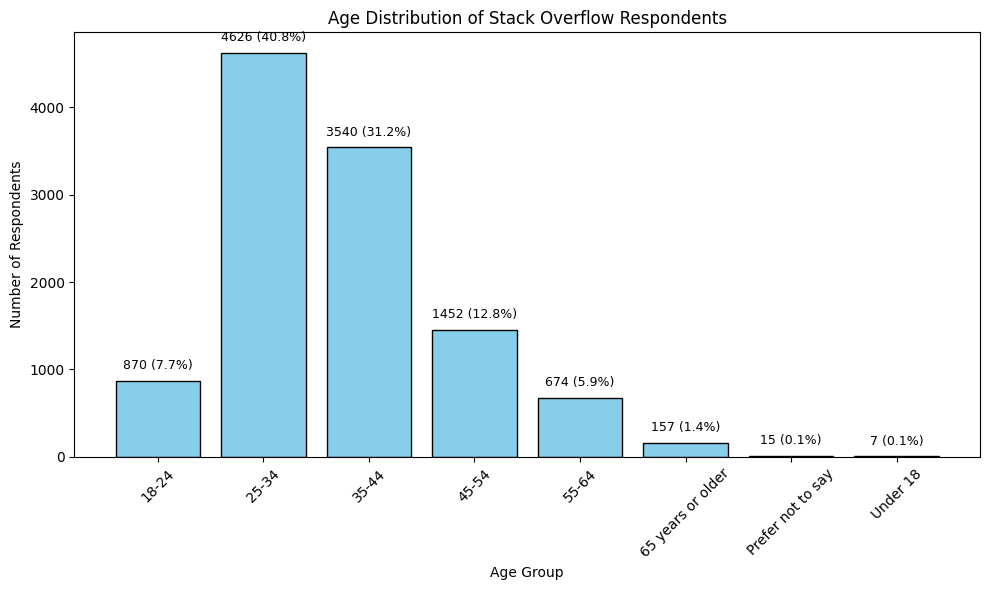

In [25]:
import matplotlib.pyplot as plt

# Count age groups
age_counts = df_stack_overflow_2023['Age'].value_counts().sort_index()
age_percent = round((age_counts / age_counts.sum()) * 100, 1)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')

# Add value and % on top of bars
for bar, count, pct in zip(bars, age_counts.values, age_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'{count} ({pct}%)', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.title("Age Distribution of Stack Overflow Respondents")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

**Observations**

Based on the Age Distribution plot,

* The largest group is **25–34**, representing 40.8% of all respondents (4626 people).
* **35–44** comes next at 31.2% (3540 respondents).
* **45–54** accounts for 12.8%, and **18–24** for 7.7%.
* There aren’t many respondents above age 54:
  * **55–64**: 5.9%
  * **65 years or older**: 1.4%
* Very few respondents are in **Under 18** (only 7), and some selected **Prefer not to say** (15).

### Working Arrangement

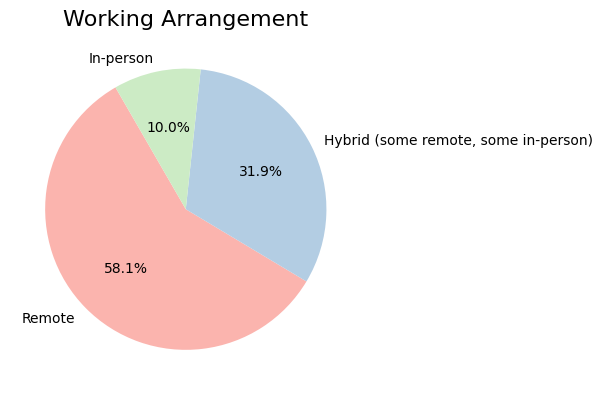

In [26]:
import matplotlib.pyplot as plt

# Value counts for RemoteWork column
work_counts = df_stack_overflow_2023['RemoteWork'].value_counts()
work_percent = (work_counts / work_counts.sum()) * 100

# Plot
colors = ['#fbb4ae', '#b3cde3', '#ccebc5']  # Optional pastel color scheme
plt.figure(figsize=(6, 6))
plt.pie(work_percent, labels=work_counts.index, autopct='%1.1f%%', colors=colors, startangle=120)
plt.title('Working Arrangement', fontsize=16)
plt.tight_layout()
plt.show()

**Observations**

Based on the Work Arrangement pie chart:

* The majority of respondents work fully **remote**. This group makes up **58.1%** of the dataset.
* Hybrid setups, where people split their time between **remote and in-person**, account for **31.9%**.
* Only **10.0%** of respondents report working fully **in-person**.

### Education Level Distribution of Developers

**Strategy**

* We printed the value counts for the `EdLevel` column and noticed duplicated entries caused by inconsistent apostrophe formatting (e.g., `Bachelor’s degree` vs `Bachelor's degree`).
* To fix this, we normalized all apostrophes using `.str.replace("’", "'", regex=False)`.
* After cleaning, we recalculated the value counts and percentages for each education level.
* We then created a custom legend by combining each label with its corresponding percentage.
* Finally, we plotted a pie chart with the updated values and added a side legend for clarity.

In [27]:
print(df_stack_overflow_2023['EdLevel'].value_counts())

EdLevel
Bachelor’s degree                                         6158
Master’s degree                                           1879
Some college/university study without earning a degree    1318
Bachelor's degree                                          565
Associate degree                                           487
Professional degree                                        457
Secondary school                                           236
Master's degree                                            179
Primary/elementary school                                   31
Something else                                              31
Name: count, dtype: int64


In [28]:
# Normalize the normalize the apostrophes across the column
df_stack_overflow_2023['EdLevel'] = df_stack_overflow_2023['EdLevel'].str.replace("’", "'", regex=False)

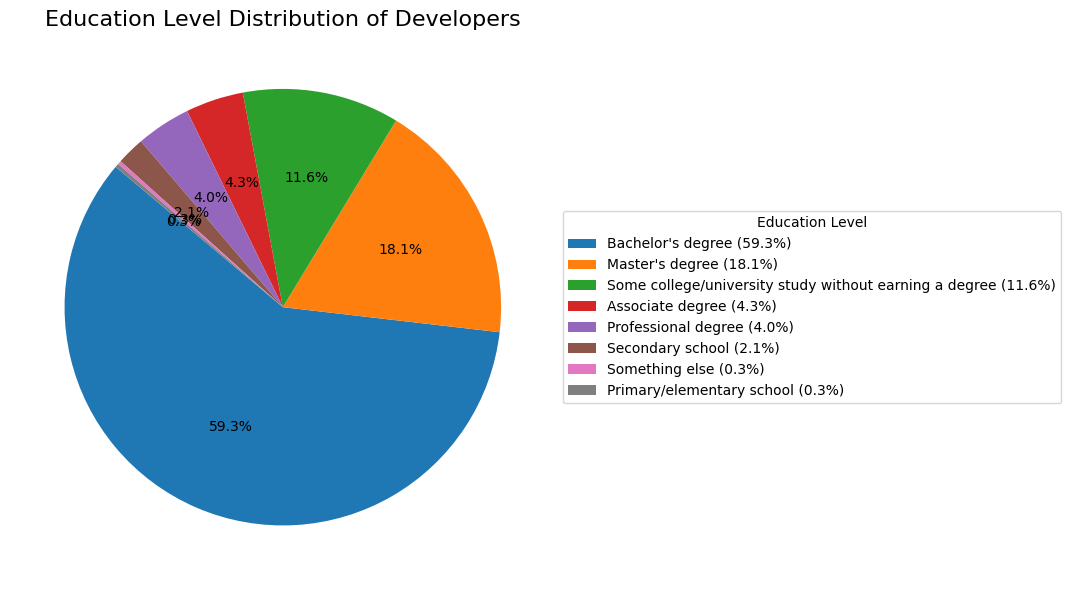

In [29]:
import matplotlib.pyplot as plt

# Count and percentage for education level
edu_counts = df_stack_overflow_2023['EdLevel'].value_counts()
edu_percent = (edu_counts / edu_counts.sum()) * 100

# Create custom legend labels
legend_labels = [f"{label} ({percent:.1f}%)" for label, percent in zip(edu_counts.index, edu_percent)]

# Plot pie chart without labels
plt.figure(figsize=(10, 6))
plt.pie(
    edu_percent,
    labels=None,  # Hide default labels
    autopct='%1.1f%%',
    startangle=140
)

# Add legend with custom labels
plt.legend(legend_labels, title="Education Level", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Education Level Distribution of Developers', fontsize=16)
plt.tight_layout()
plt.show()

**Observations**

Based on the Education Level Distribution pie chart:

* The majority of developers hold a **Bachelor’s degree**, making up 59.3% of the responses.
* The second largest group holds a **Master’s degree**, at 18.1%.
* 11.6% of respondents reported **some college or university study without earning a degree**.
* Smaller portions hold an **Associate degree** (4.3%), **Professional degree** (4.0%), or **Secondary school** education (2.1%).
* Very few respondents selected **Primary/elementary school** (0.3%) or **Something else** (0.3%).

Overall, the majority of developers have formal post-secondary education, with over 70% holding at least a bachelor's or master’s degree.

### Understanding the Salary Distribution by Age Group

C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\542930054.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


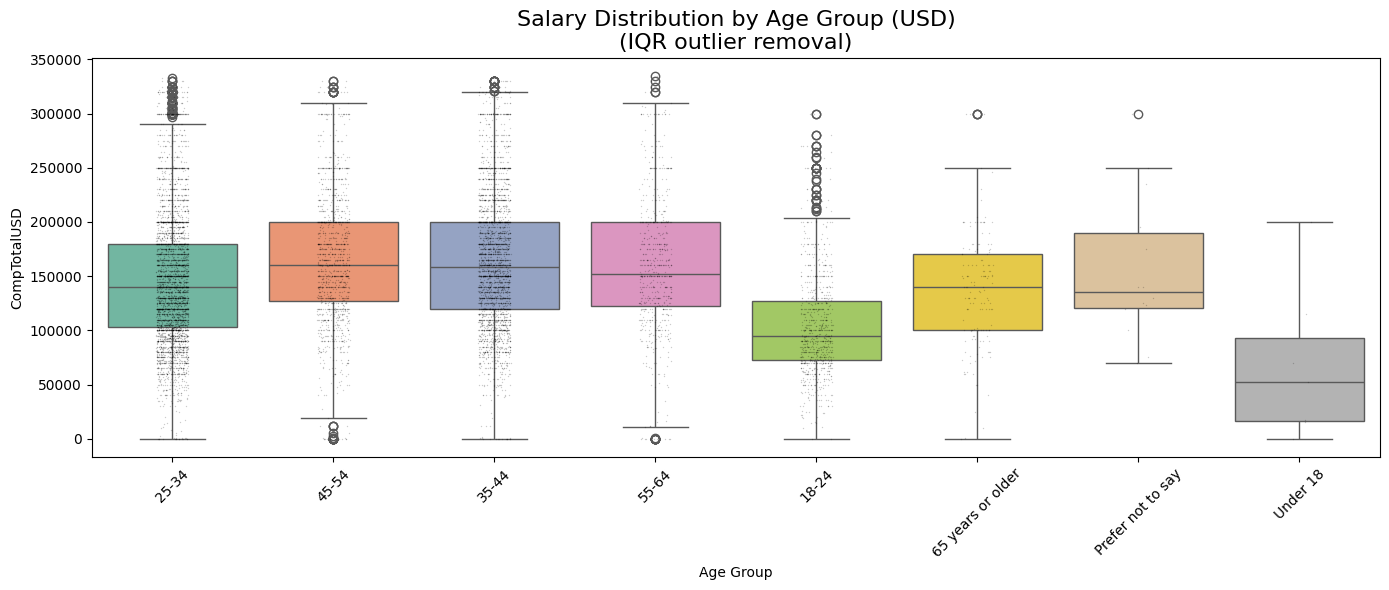

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers using IQR for 'CompTotalUSD'
Q1 = df_stack_overflow_2023['CompTotal'].quantile(0.25)
Q3 = df_stack_overflow_2023['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Filtered DataFrame
df_filtered = df_stack_overflow_2023[
    (df_stack_overflow_2023['CompTotal'] >= Q1 - 1.5 * IQR) &
    (df_stack_overflow_2023['CompTotal'] <= Q3 + 1.5 * IQR)
]

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Age',
    y='CompTotal',
    data=df_filtered,
    showfliers=True,  # show dots
    palette='Set2'
)
sns.stripplot(
    x='Age',
    y='CompTotal',
    data=df_filtered,
    color='black',
    size=1,
    jitter=True,
    alpha=0.2
)

plt.title('Salary Distribution by Age Group (USD)\n(IQR outlier removal)', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('CompTotalUSD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations**

Based on the boxplots of salary distribution by age group (after IQR outlier removal):

* The highest median salaries appear in the **45–54**, **35–44**, and **55–64** groups, each falling roughly between **$130,000** and **$150,000**.
* The **25–34** group shows a slightly lower median, around **$120,000**, but with a wide spread across salary levels.
* The **18–24** and **Under 18** groups have the lowest medians, generally under **$90,000**, which reflects their early career stages.
* The **65 years or older** group has more variation, with a median close to **$130,000**, but slightly lower than mid-career ranges.
* The **"Prefer not to say"** group shows a relatively high median and upper range, possibly due to senior or high-paying niche roles.

Overall, salary tends to increase with age and experience until mid-50s, then levels off or slightly declines in later age groups.

### Top 10 Developer Types

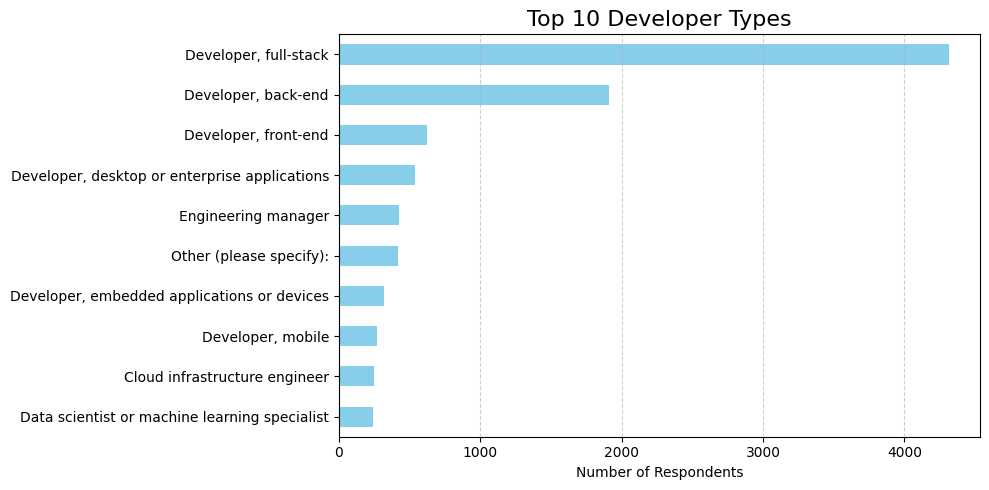

In [31]:
import matplotlib.pyplot as plt

# Assume `top_dev_types` is already a Series or DataFrame with top 10 values
# If not, compute it like this:
top_dev_types = df_stack_overflow_2023['DevType'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_dev_types.sort_values().plot(kind='barh', color='skyblue')

plt.title('Top 10 Developer Types', fontsize=16)
plt.xlabel('Number of Respondents')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Observations**

Based on the Bar Chart:

* **Full-stack developers** are the most common, with over 4,000 respondents selecting this role.
* **Back-end developers** are the second most common, with close to 2000 respondents.
* **Front-end developers** rank third, with around 600 respondents. It falls behind full-stack and back-end by a large margin.
* Roles  suchas **desktop/enterprise application developer**, **engineering manager**, and **embedded developer** have moderate representation.
* **Mobile developers**, **cloud infrastructure engineers**, and **data scientists or ML specialists** appear less frequently in the top 10.
* The **"Other (please specify)"** category also has a notable share, showing that many respondents identify with roles outside the predefined options.

### Total Years of Coding Experience by Age Group

C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\2695901089.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


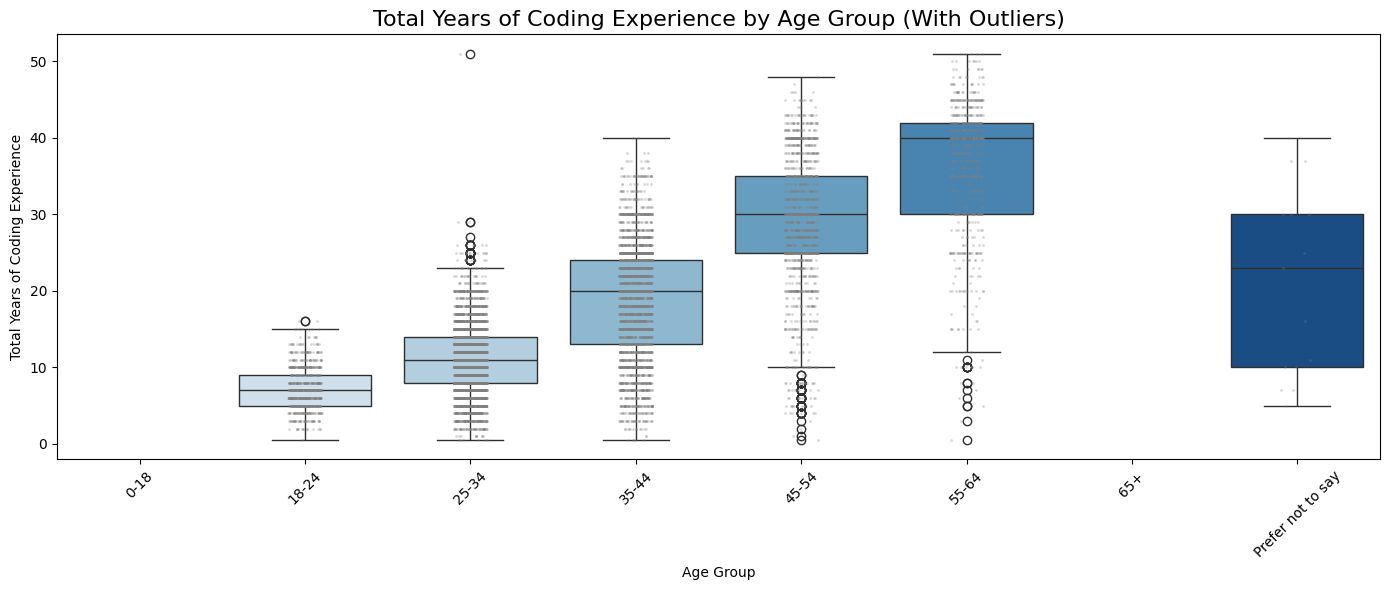

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaned DataFrame assumed loaded as:
# df_stack_overflow_2023

# Extract relevant columns
df_exp = df_stack_overflow_2023[['Age', 'YearsCode']].copy()
df_exp.dropna(inplace=True)

# Convert to numeric
df_exp['YearsCode'] = pd.to_numeric(df_exp['YearsCode'], errors='coerce')

# Keep only valid age groups
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']
df_exp = df_exp[df_exp['Age'].isin(age_order)]

# Plot: WITH outliers
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_exp,
    x='Age',
    y='YearsCode',
    order=age_order,
    palette='Blues'
)
sns.stripplot(
    data=df_exp,
    x='Age',
    y='YearsCode',
    order=age_order,
    color='gray',
    alpha=0.3,
    jitter=True,
    size=2
)

plt.title('Total Years of Coding Experience by Age Group (With Outliers)', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("years_experience_by_age_with_outliers.png", dpi=300)
plt.show()

### Total Years of Coding Experience by Age Group, using IQR-filtered data

C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\2847006315.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_exp_iqr = df_exp.groupby('Age', group_keys=False).apply(filter_iqr)
C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\2847006315.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


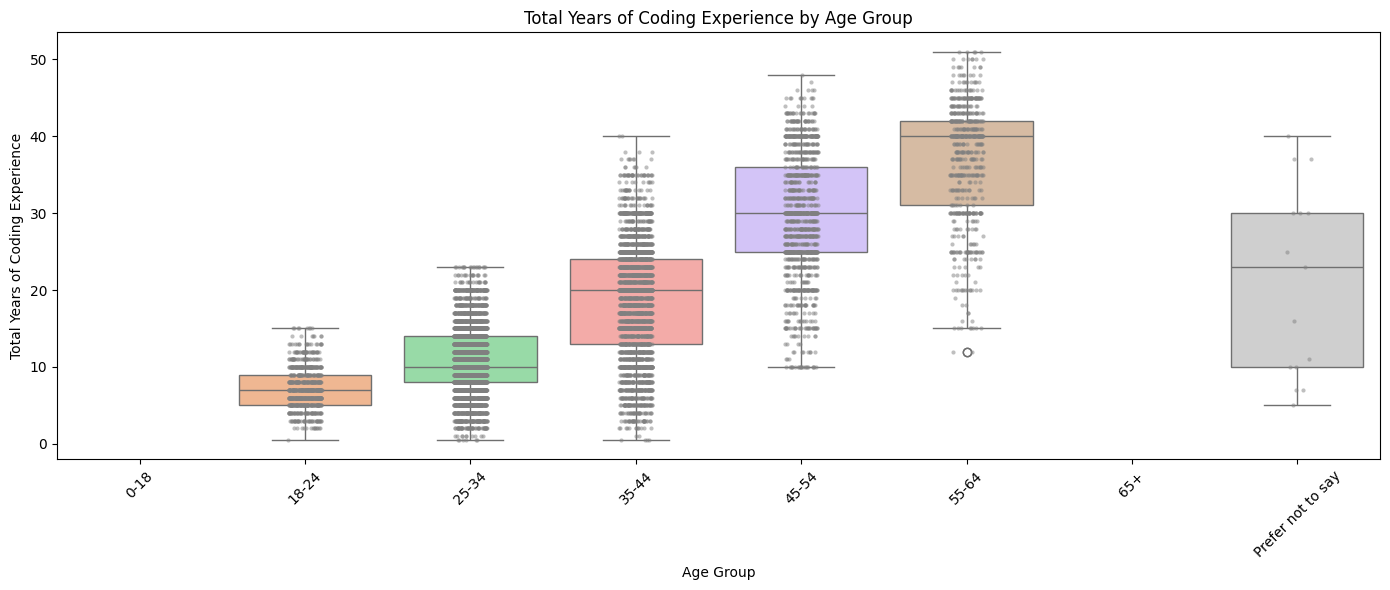

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only relevant columns
df_exp = df_stack_overflow_2023[['Age', 'YearsCode']].copy()

# Drop rows with missing values
df_exp.dropna(inplace=True)

# Convert YearsCode to numeric (if not already)
df_exp['YearsCode'] = pd.to_numeric(df_exp['YearsCode'], errors='coerce')

# Define age group order
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']

# Filter to known age groups only
df_exp = df_exp[df_exp['Age'].isin(age_order)]

# IQR Filtering (per age group)
def filter_iqr(group):
    q1 = group['YearsCode'].quantile(0.25)
    q3 = group['YearsCode'].quantile(0.75)
    iqr = q3 - q1
    return group[(group['YearsCode'] >= q1 - 1.5 * iqr) & (group['YearsCode'] <= q3 + 1.5 * iqr)]

df_exp_iqr = df_exp.groupby('Age', group_keys=False).apply(filter_iqr)

# Plot: Boxplot with jitter (filtered)
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_exp_iqr,
    x='Age',
    y='YearsCode',
    order=age_order,
    palette='pastel'
)
sns.stripplot(
    data=df_exp_iqr,
    x='Age',
    y='YearsCode',
    order=age_order,
    color='gray',
    alpha=0.5,
    jitter=True,
    size=3
)

# Titles and labels
plt.title('Total Years of Coding Experience by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)

# save to file
plt.tight_layout()
plt.savefig("total_years_experience_by_age_group.png", dpi=300)
plt.show()


**Observations**

Looking at the boxplot, we can see that:

* Most age groups follow a general pattern, older groups tend to report more years of coding.
* The **25–34** group has a more concentrated range, with most respondents reporting between 7 and 14 years of experience.
* The **35–44** group shows a much wider spread. Some respondents report over 20 years, which suggests a number of early starters.
* The **45–54** and **55–64** groups cluster more tightly around higher experience levels, but a few respondents still report under 10 years, hinting at possible late-career transitions.
* The **65+** group has fewer responses but includes both long-timers and those with more modest experience levels.
* The **"Prefer not to say"** group is quite mixed, with responses ranging from under 10 years to nearly 40.

So while the trend of experience growing with age makes sense, the chart also shows that not every developer journey fits the same timeline.

### Education Level vs. Salary

C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\3968777756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


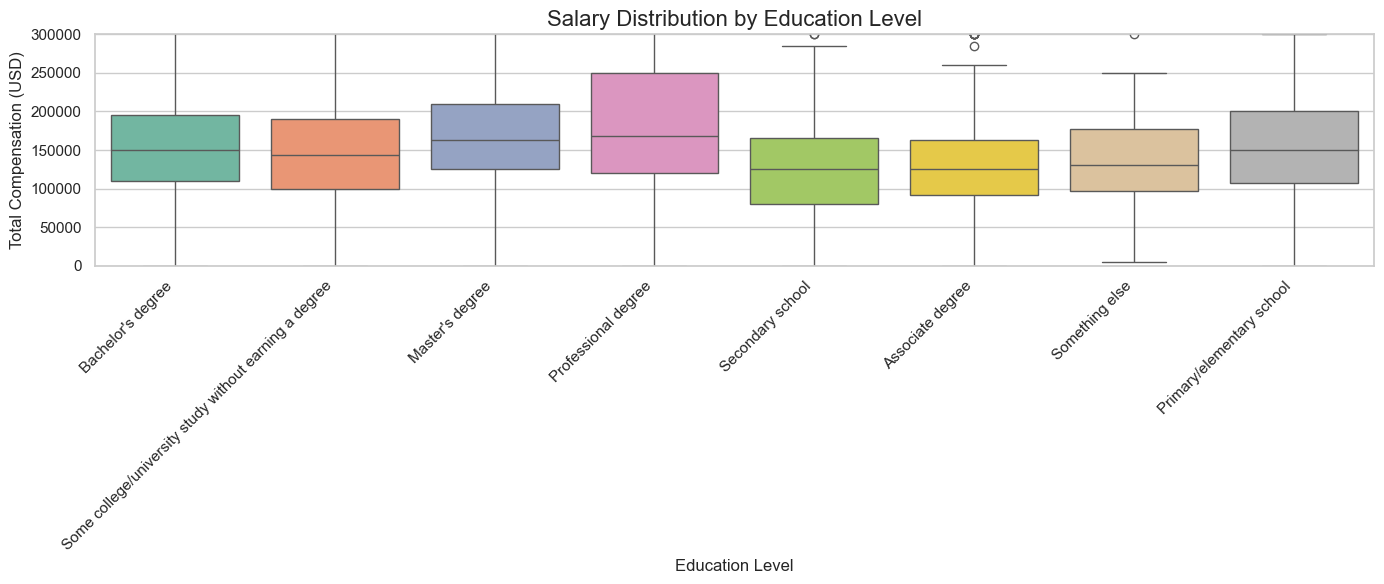

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_stack_overflow_2023,
    x="EdLevel",
    y="CompTotal",
    palette="Set2"
)

# Enhance readability
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 300000)  # You can adjust this based on outlier removal
plt.title("Salary Distribution by Education Level", fontsize=16)
plt.xlabel("Education Level")
plt.ylabel("Total Compensation (USD)")

plt.tight_layout()
plt.show()


**Observations**

Based on the Box Plots of Salary Distribution by Education Level:

* Developers with a **Professional degree** report the highest median salaries, with a few earning close to the top of the scale.
* **Master's** and **Bachelor’s** degree holders follow closely, with similar salary distributions.
* Respondents who had **some college or university without finishing** are not far behind, which suggests that experience or skills might carry more weight than credentials in some dev roles.
* Those with **Associate degrees** or who finished **secondary school** tend to earn less, but there’s still overlap with higher education levels.
* The **“Something else”** and **Primary/elementary school** groups show a wide spread, with a few high earners, likely self-taught or non-traditional paths.
* High outliers are present in almost every group, which reflects the flexibility of tech careers.

### Salary vs. Remote Work Status

C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\3853051647.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


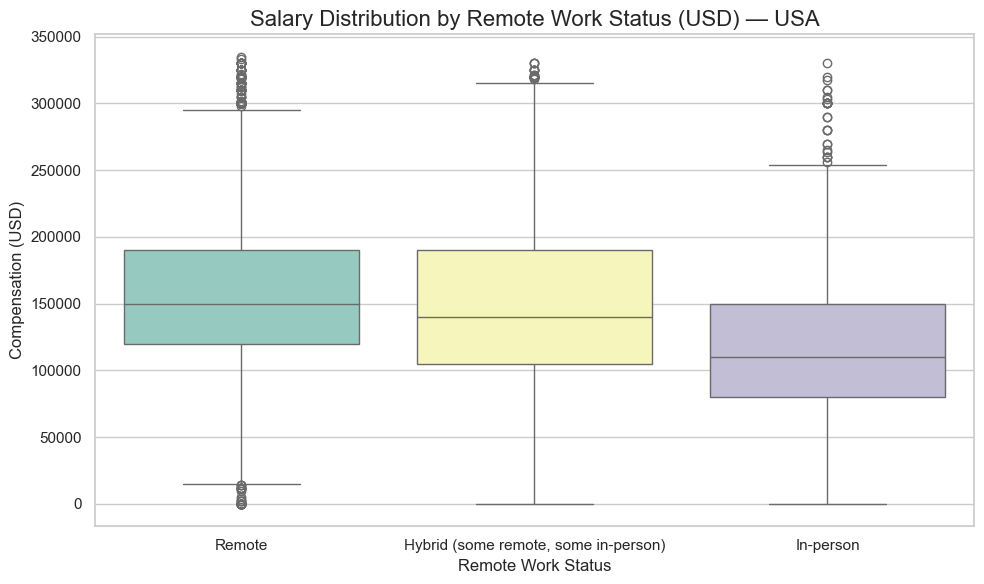

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter: non-null salary + remote work responses
df_remote_salary = df_stack_overflow_2023[
    (df_stack_overflow_2023['RemoteWork'].notna()) &
    (df_stack_overflow_2023['CompTotal'].notna())
]

# remove extreme outliers (IQR-based)
Q1 = df_remote_salary['CompTotal'].quantile(0.25)
Q3 = df_remote_salary['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_remote_salary[
    (df_remote_salary['CompTotal'] >= Q1 - 1.5 * IQR) &
    (df_remote_salary['CompTotal'] <= Q3 + 1.5 * IQR)
]

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered_df,
    x='RemoteWork',
    y='CompTotal',
    palette='Set3'
)
plt.title('Salary Distribution by Remote Work Status (USD) — USA', fontsize=16)
plt.ylabel('Compensation (USD)')
plt.xlabel('Remote Work Status')
plt.tight_layout()
plt.show()


**Observations**

Based on the boxplot, we can see that:

* **Remote** workers have a median compensation around **$150k**, with a fairly wide spread and a noticeable number of high earners above **$300k**.
* **Hybrid** roles also show a similar median, just slightly below **$150k**, and have a slightly wider spread.
* **In-person** roles have the lowest median, just above **$100k**, and a tight interquartile range.
* The range of salaries is broader for remote and hybrid roles, especially in the upper end, while in-person compensation tends to cluster lower.

### Heatmap of Salary Correlation (numeric fields)

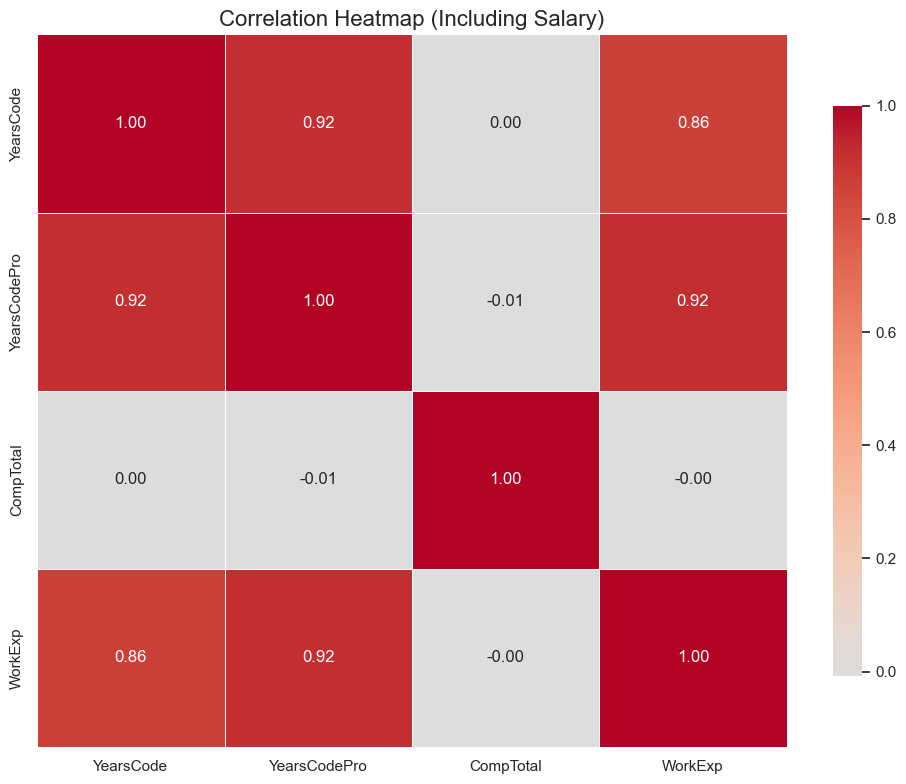

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = df_stack_overflow_2023.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Including Salary)", fontsize=16)
plt.tight_layout()
plt.show()

**Observation**

Based on the correlation heatmap:

* `YearsCode`, `YearsCodePro`, and `WorkExp` are all strongly correlated with each other (above 0.85), which makes sense since they measure similar aspects of experience.
* `YearsCodePro` and `WorkExp` are nearly identical (0.92). This suggests that respondents answer their professional coding years almost the same as overall work experience.
* `CompTotal` (total compensation) shows near-zero correlation with all experience metrics, meaning salary doesn’t line up clearly with years of experience in this dataset.

So overall, experience variables stick together closely, but they don’t really explain compensation here.

### Most Common Languages

C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\2455642051.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_langs.values, y=top_langs.index, palette='crest')


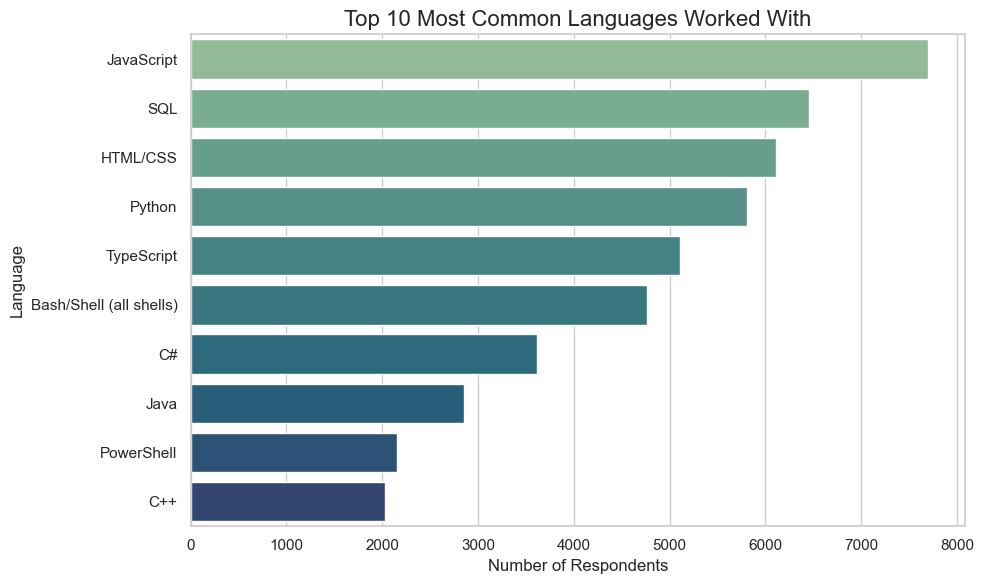

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split multi-label responses for languages
lang_series = df_stack_overflow_2023['LanguageHaveWorkedWith'].dropna().str.split(';')
lang_flat = pd.Series([lang.strip() for sublist in lang_series for lang in sublist])

# Count top 10 languages
top_langs = lang_flat.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_langs.values, y=top_langs.index, palette='crest')
plt.title("Top 10 Most Common Languages Worked With", fontsize=16)
plt.xlabel("Number of Respondents")
plt.ylabel("Language")
plt.tight_layout()
plt.show()

**Observations**

Based on the Bar Plot of the Top 10 Most Common Languages Worked With:

* **JavaScript** is the most popular language, with over **~7600** respondents.
* **SQL** is the second most popular language, with around **~6400** respondents. 
* **HTML/CSS**, and **Python** followed close behind, with around **~6100** and **~5800** respondents respectively. 
* **TypeScript** and **Bash/Shell** also rank high, with around **~5100** and **~4700** respondents respectively.
* On the other hand, **C#**, **Java**, **PowerShell**, and **C++** have less than **~5000** repondents. This makes sense since these tend to be more common in enterprise, backend, or system-level work.
* The top half leans toward full stack and scripting tools, while the lower half includes more niche or legacy technologies.

### Most Common Languages

C:\Users\xnoor\AppData\Local\Temp\ipykernel_4760\147845323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dbs.values, y=top_dbs.index, palette='flare')


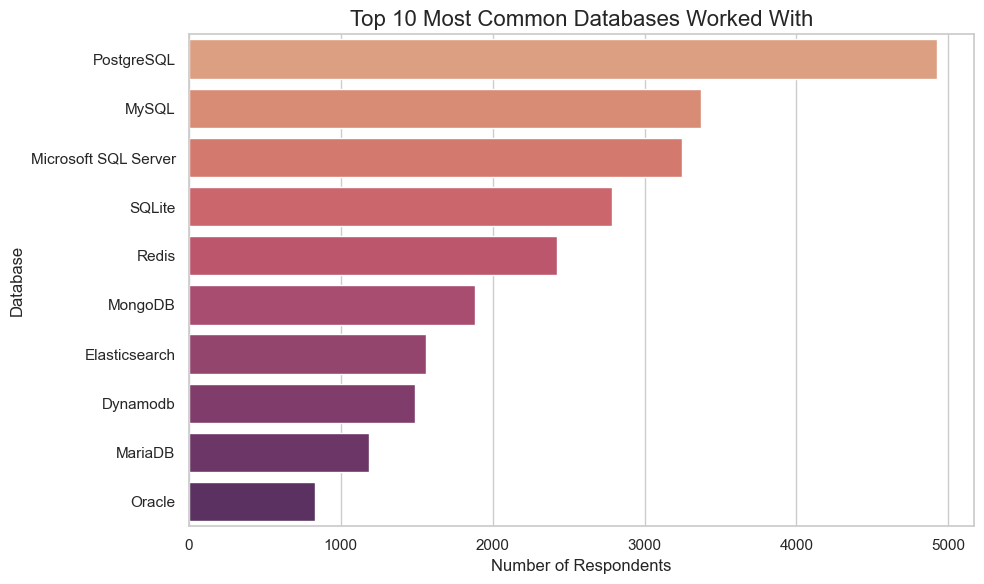

In [38]:
# Split and flatten database column
db_series = df_stack_overflow_2023['DatabaseHaveWorkedWith'].dropna().str.split(';')
db_flat = pd.Series([db.strip() for sublist in db_series for db in sublist])

# Count top 10 databases
top_dbs = db_flat.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dbs.values, y=top_dbs.index, palette='flare')
plt.title("Top 10 Most Common Databases Worked With", fontsize=16)
plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.tight_layout()
plt.show()

**Observations**

Based on the Bar Plot of the Top 10 Most Common Databases Worked With:

* **PostgreSQL** leads with just under **5000** respondents.
* **MySQL** and **Microsoft SQL Server** follow closely, with **~3400** and **~3250** respondents. 
* **SQLite**, **Redis**, and **MongoDB** are all used by over **2000** people, putting them in the middle of list.
* **Elasticsearch**, **DynamoDB**, **MariaDB**, and **Oracle** have lower counts but still show up enough to make the top 10.

# Export cleaned dataset to csv

**Strategy**

* We saved the cleaned dataset as a CSV file (`stack_overflow_cleaned.csv`) to preserve all the preprocessing steps completed so far.
* The cleaned file will be reused in `AML2203_Final_Project_2025S_Modeling_Final.ipynb` for further processing and model training.

In [39]:
# Save cleaned data to CSV
df_stack_overflow_2023.to_csv('stack_overflow_cleaned.csv', index=False)

In [40]:
df_stack_overflow_2023.dtypes

Age                                object
Employment                         object
RemoteWork                         object
EdLevel                            object
LearnCodeCoursesCert               object
YearsCode                         float64
YearsCodePro                      float64
DevType                            object
OrgSize                            object
CompTotal                         float64
LanguageHaveWorkedWith             object
DatabaseHaveWorkedWith             object
PlatformHaveWorkedWith             object
WebframeHaveWorkedWith             object
MiscTechHaveWorkedWith             object
ToolsTechHaveWorkedWith            object
NEWCollabToolsHaveWorkedWith       object
OpSysPersonal use                  object
OpSysProfessional use              object
OfficeStackAsyncHaveWorkedWith     object
OfficeStackSyncHaveWorkedWith      object
AISearchHaveWorkedWith             object
AISelect                           object
AIToolCurrently Using             

**Conclusion**

* This notebook finalizes the cleaning stage, including all transformations, text cleanup, and standardization.
* Next, we will load the cleaned dataset into the modeling notebook, where we will perform encoding, feature selection, and train predictive models.